In [2]:
set.seed(1984)
library(tidyverse)
library(tidymodels)
library(readxl)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [3]:
#URL https://public.dhe.ibm.com/software/data/sw-library/cognos/mobile/C11/data/CustomerChurn.xlsx

url <- "https://public.dhe.ibm.com/software/data/sw-library/cognos/mobile/C11/data/CustomerChurn.xlsx"

download.file(url, "Churn_Data.xlsx")

churn_data <- read_excel("Churn_Data.xlsx")
churn_data
#Don't read from relative path, pull from url

LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,⋯,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
318537,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
152148,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,⋯,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
326527,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,⋯,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
845894,7795-CFOCW,No,No,No,45,No,No phone service,DSL,Yes,⋯,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
503388,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
160192,9305-CDSKC,No,No,No,8,Yes,Yes,Fiber optic,No,⋯,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
680623,1452-KIOVK,No,No,Yes,22,Yes,Yes,Fiber optic,No,⋯,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
340874,6713-OKOMC,No,No,No,10,No,No phone service,DSL,Yes,⋯,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
582674,7892-POOKP,No,Yes,No,28,Yes,Yes,Fiber optic,No,⋯,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes


In [4]:
#Changing categorial variables from characters/dbl to factors

#churn_data <- churn_data %>%
 #   mutate(across(gender:Dependents, as.factor))%>%
  #  mutate(across(PhoneService:PaymentMethod, as.factor))
#churn_data
           
    

In [5]:
colnames(churn_data) <- make.names(colnames(churn_data))


churn_data

LoyaltyID,Customer.ID,Senior.Citizen,Partner,Dependents,Tenure,Phone.Service,Multiple.Lines,Internet.Service,Online.Security,⋯,Device.Protection,Tech.Support,Streaming.TV,Streaming.Movies,Contract,Paperless.Billing,Payment.Method,Monthly.Charges,Total.Charges,Churn
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
318537,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
152148,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,⋯,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
326527,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,⋯,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
845894,7795-CFOCW,No,No,No,45,No,No phone service,DSL,Yes,⋯,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
503388,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
160192,9305-CDSKC,No,No,No,8,Yes,Yes,Fiber optic,No,⋯,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
680623,1452-KIOVK,No,No,Yes,22,Yes,Yes,Fiber optic,No,⋯,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
340874,6713-OKOMC,No,No,No,10,No,No phone service,DSL,Yes,⋯,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
582674,7892-POOKP,No,Yes,No,28,Yes,Yes,Fiber optic,No,⋯,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes


In [6]:
  churn_wrangle <- churn_data %>%
    select(Senior.Citizen,Tenure,Contract, Payment.Method, Phone.Service, Internet.Service, Monthly.Charges, Churn) %>%
    mutate(Contract=replace(Contract, Contract=="Month-to-month", 0)) %>%
    mutate(Contract=replace(Contract, Contract=="One year", 1)) %>%
    mutate(Contract=replace(Contract, Contract=="Two year", 2)) %>%
    mutate(Payment.Method=replace(Payment.Method, Payment.Method=="Electronic check", 0)) %>%
    mutate(Payment.Method=replace(Payment.Method, Payment.Method=="Mailed check", 1)) %>%
    mutate(Payment.Method=replace(Payment.Method, Payment.Method=="Credit card (automatic)", 2)) %>%
    mutate(Payment.Method=replace(Payment.Method, Payment.Method=="Bank transfer (automatic)", 3)) %>%
    mutate(Phone.Service=replace(Phone.Service, Phone.Service=="No", 0)) %>%
    mutate(Phone.Service=replace(Phone.Service, Phone.Service=="Yes", 1)) %>%
    mutate(Internet.Service=replace(Internet.Service, Internet.Service=="DSL", 1)) %>%
    mutate(Internet.Service=replace(Internet.Service, Internet.Service=="Fiber optic", 1)) %>%
    mutate(Internet.Service=replace(Internet.Service, Internet.Service=="No", 0))%>%
    mutate(Senior.Citizen=replace(Senior.Citizen, Senior.Citizen=="No", 0))%>% 
    mutate(Senior.Citizen=replace(Senior.Citizen, Senior.Citizen=="Yes", 1)) 
churn_wrangle

Senior.Citizen,Tenure,Contract,Payment.Method,Phone.Service,Internet.Service,Monthly.Charges,Churn
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
0,1,0,0,0,1,29.85,No
0,34,1,1,1,1,56.95,No
0,2,0,1,1,1,53.85,Yes
0,45,1,3,0,1,42.30,No
0,2,0,0,1,1,70.70,Yes
0,8,0,0,1,1,99.65,Yes
0,22,0,2,1,1,89.10,No
0,10,0,1,0,1,29.75,No
0,28,0,0,1,1,104.80,Yes


In [7]:
churn_cleaned <- churn_wrangle %>%
    mutate(Churn=as.factor(Churn))%>%
    mutate(across(Senior.Citizen:Monthly.Charges, as.numeric))
churn_cleaned

Senior.Citizen,Tenure,Contract,Payment.Method,Phone.Service,Internet.Service,Monthly.Charges,Churn
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,1,0,0,0,1,29.85,No
0,34,1,1,1,1,56.95,No
0,2,0,1,1,1,53.85,Yes
0,45,1,3,0,1,42.30,No
0,2,0,0,1,1,70.70,Yes
0,8,0,0,1,1,99.65,Yes
0,22,0,2,1,1,89.10,No
0,10,0,1,0,1,29.75,No
0,28,0,0,1,1,104.80,Yes


In [8]:
churn_split <- initial_split(churn_cleaned, prop=0.75, strata=Churn)
churn_train <- training(churn_split)
churn_test <- testing(churn_split)

In [9]:
contract_type_payment <- churn_data %>%
    group_by(Contract,Payment.Method)%>%
    summarize(count=n())
contract_type_payment

`summarise()` regrouping output by 'Contract' (override with `.groups` argument)



Contract,Payment.Method,count
<chr>,<chr>,<int>
Month-to-month,Bank transfer (automatic),589
Month-to-month,Credit card (automatic),543
Month-to-month,Electronic check,1850
Month-to-month,Mailed check,893
One year,Bank transfer (automatic),391
One year,Credit card (automatic),398
One year,Electronic check,347
One year,Mailed check,337
Two year,Bank transfer (automatic),564


ERROR while rich displaying an object: Error: At least one layer must contain all faceting variables: `PaymentMethod`.
* Plot is missing `PaymentMethod`
* Layer 1 is missing `PaymentMethod`

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)

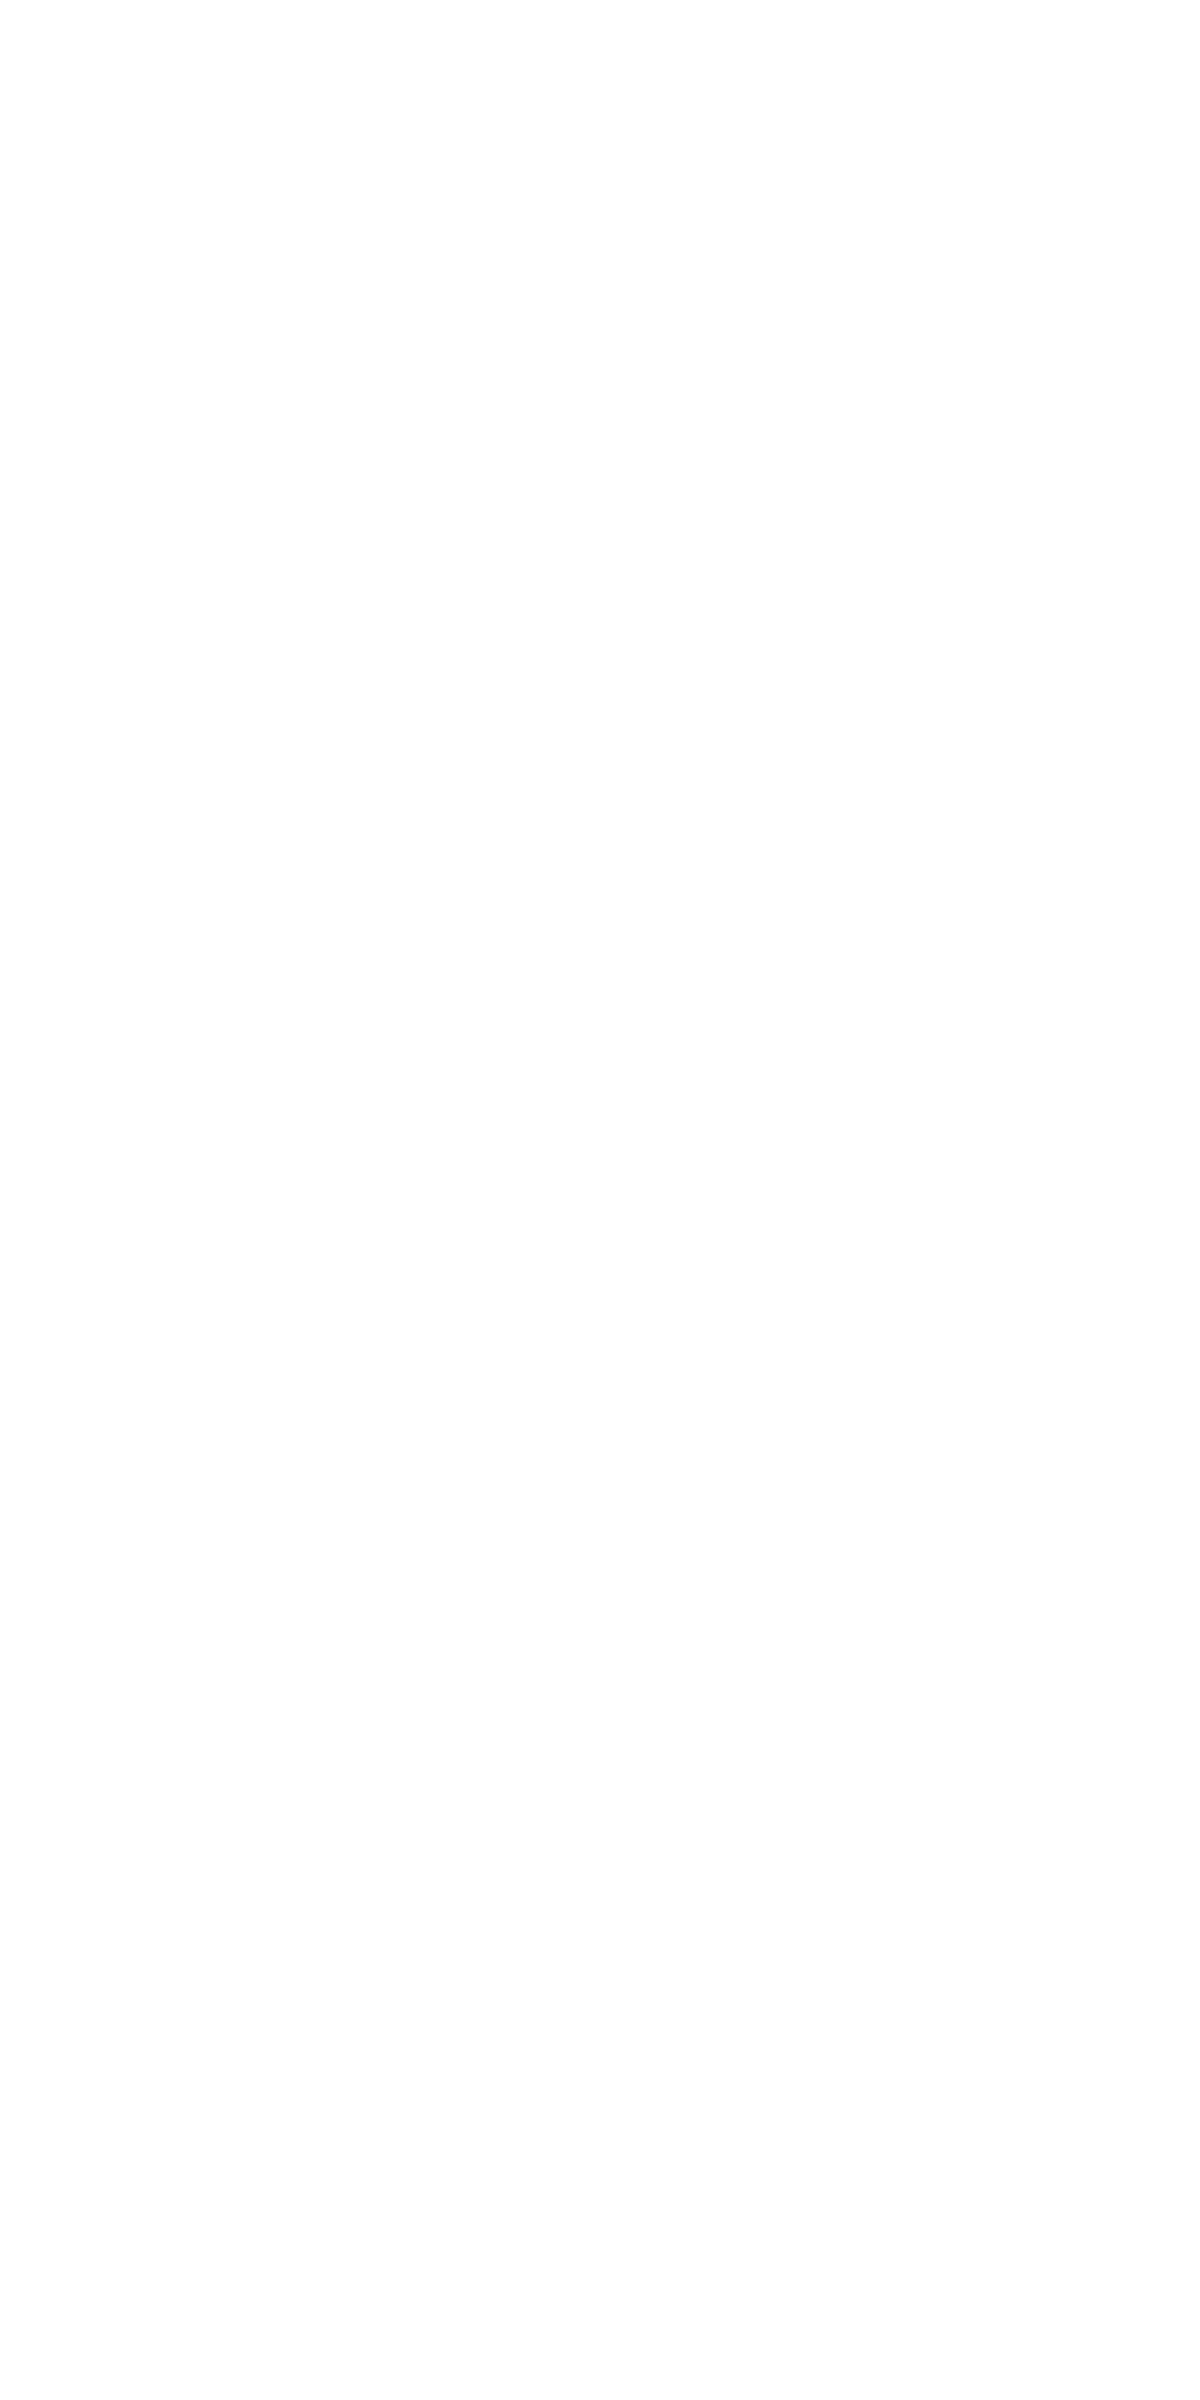

In [10]:
options(repr.plot.width = 10, repr.plot.height = 20)

contract_type_payment_grid <- contract_type_payment %>%
    ggplot(aes(x=Contract,y=count,fill=Payment.Method))+
    geom_bar(stat="identity")+
    facet_grid(PaymentMethod ~ .)+
    labs(x="Contract Type", y="Count", fill="Payment Method")+
    theme(text=element_text(size=20))
contract_type_payment_grid

NULL

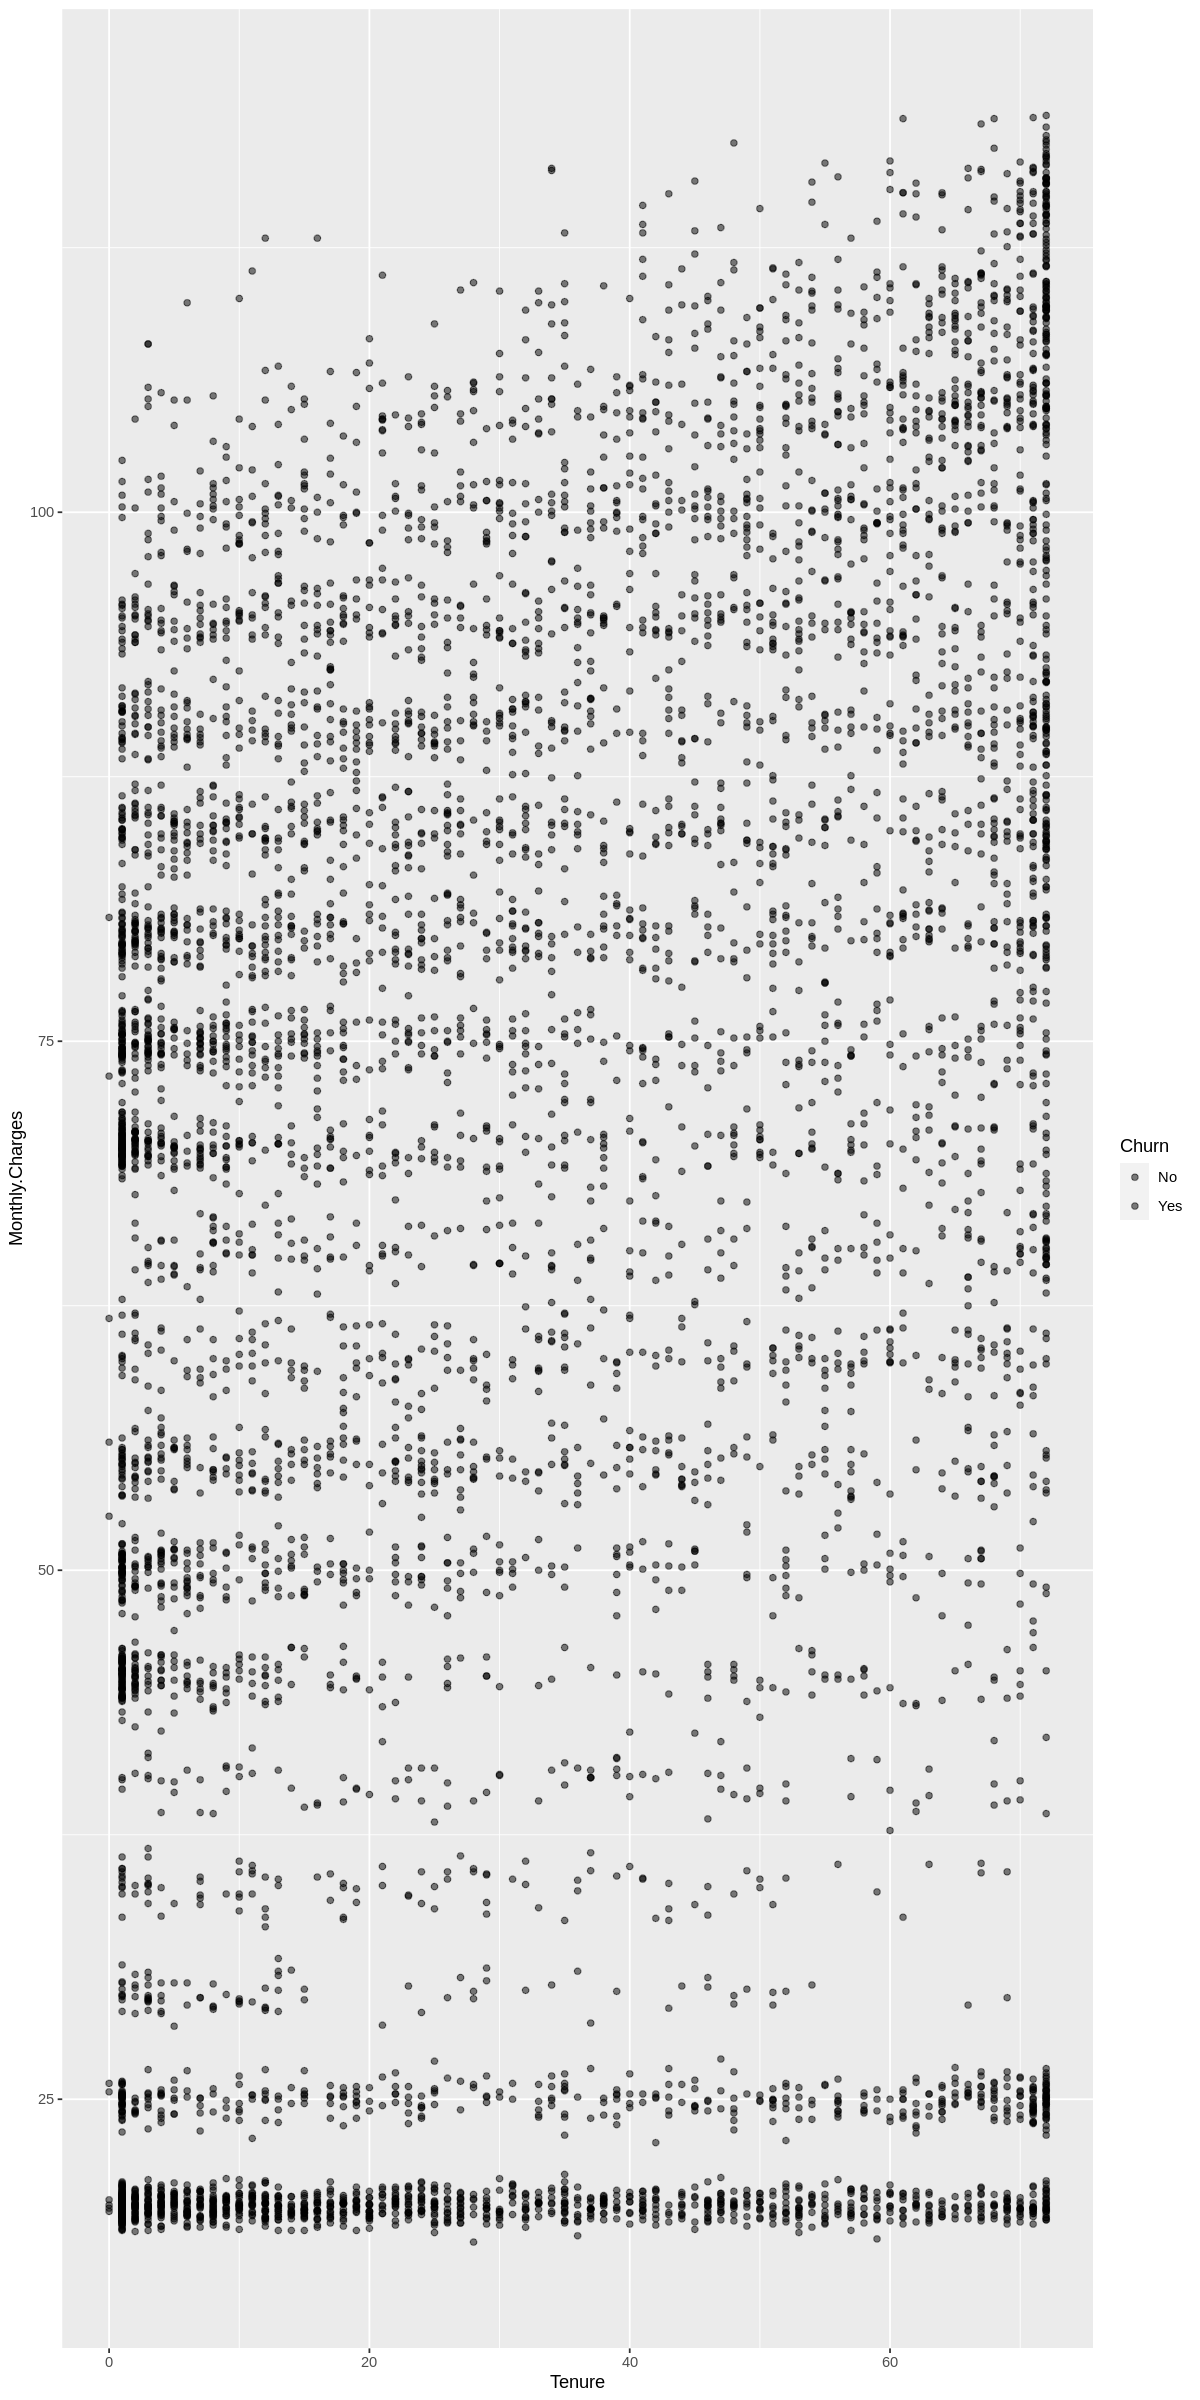

In [11]:
options(repr.plot.width = 10, repr.plot.height = 20)

contract_scatter <- churn_cleaned %>%
    ggplot(aes(x=Tenure,y=Monthly.Charges,fill=Churn))+
    geom_point(alpha=0.5)
    labs(x="Tenure", y="Monthly.Charges", fill="Churn")+
    theme(text=element_text(size=20))
contract_scatter

In [12]:
k_vals <- tibble(neighbors = seq(from = 1, to =50, by = 1))

churn_vfold <- vfold_cv(churn_train, v=5, strata=Churn)

churn_recipe <- recipe(Churn ~ ., data=churn_train)%>%
    step_scale(all_predictors())%>%
    step_center(all_predictors())

churn_spec <- nearest_neighbor(weight_func="rectangular", neighbors=tune())%>%
    set_engine("kknn")%>%
    set_mode("classification")

churn_results <- workflow() %>%
    add_recipe(churn_recipe)%>%
    add_model(churn_spec)%>%
    tune_grid(resamples=churn_vfold, grid=k_vals) %>%
    collect_metrics()


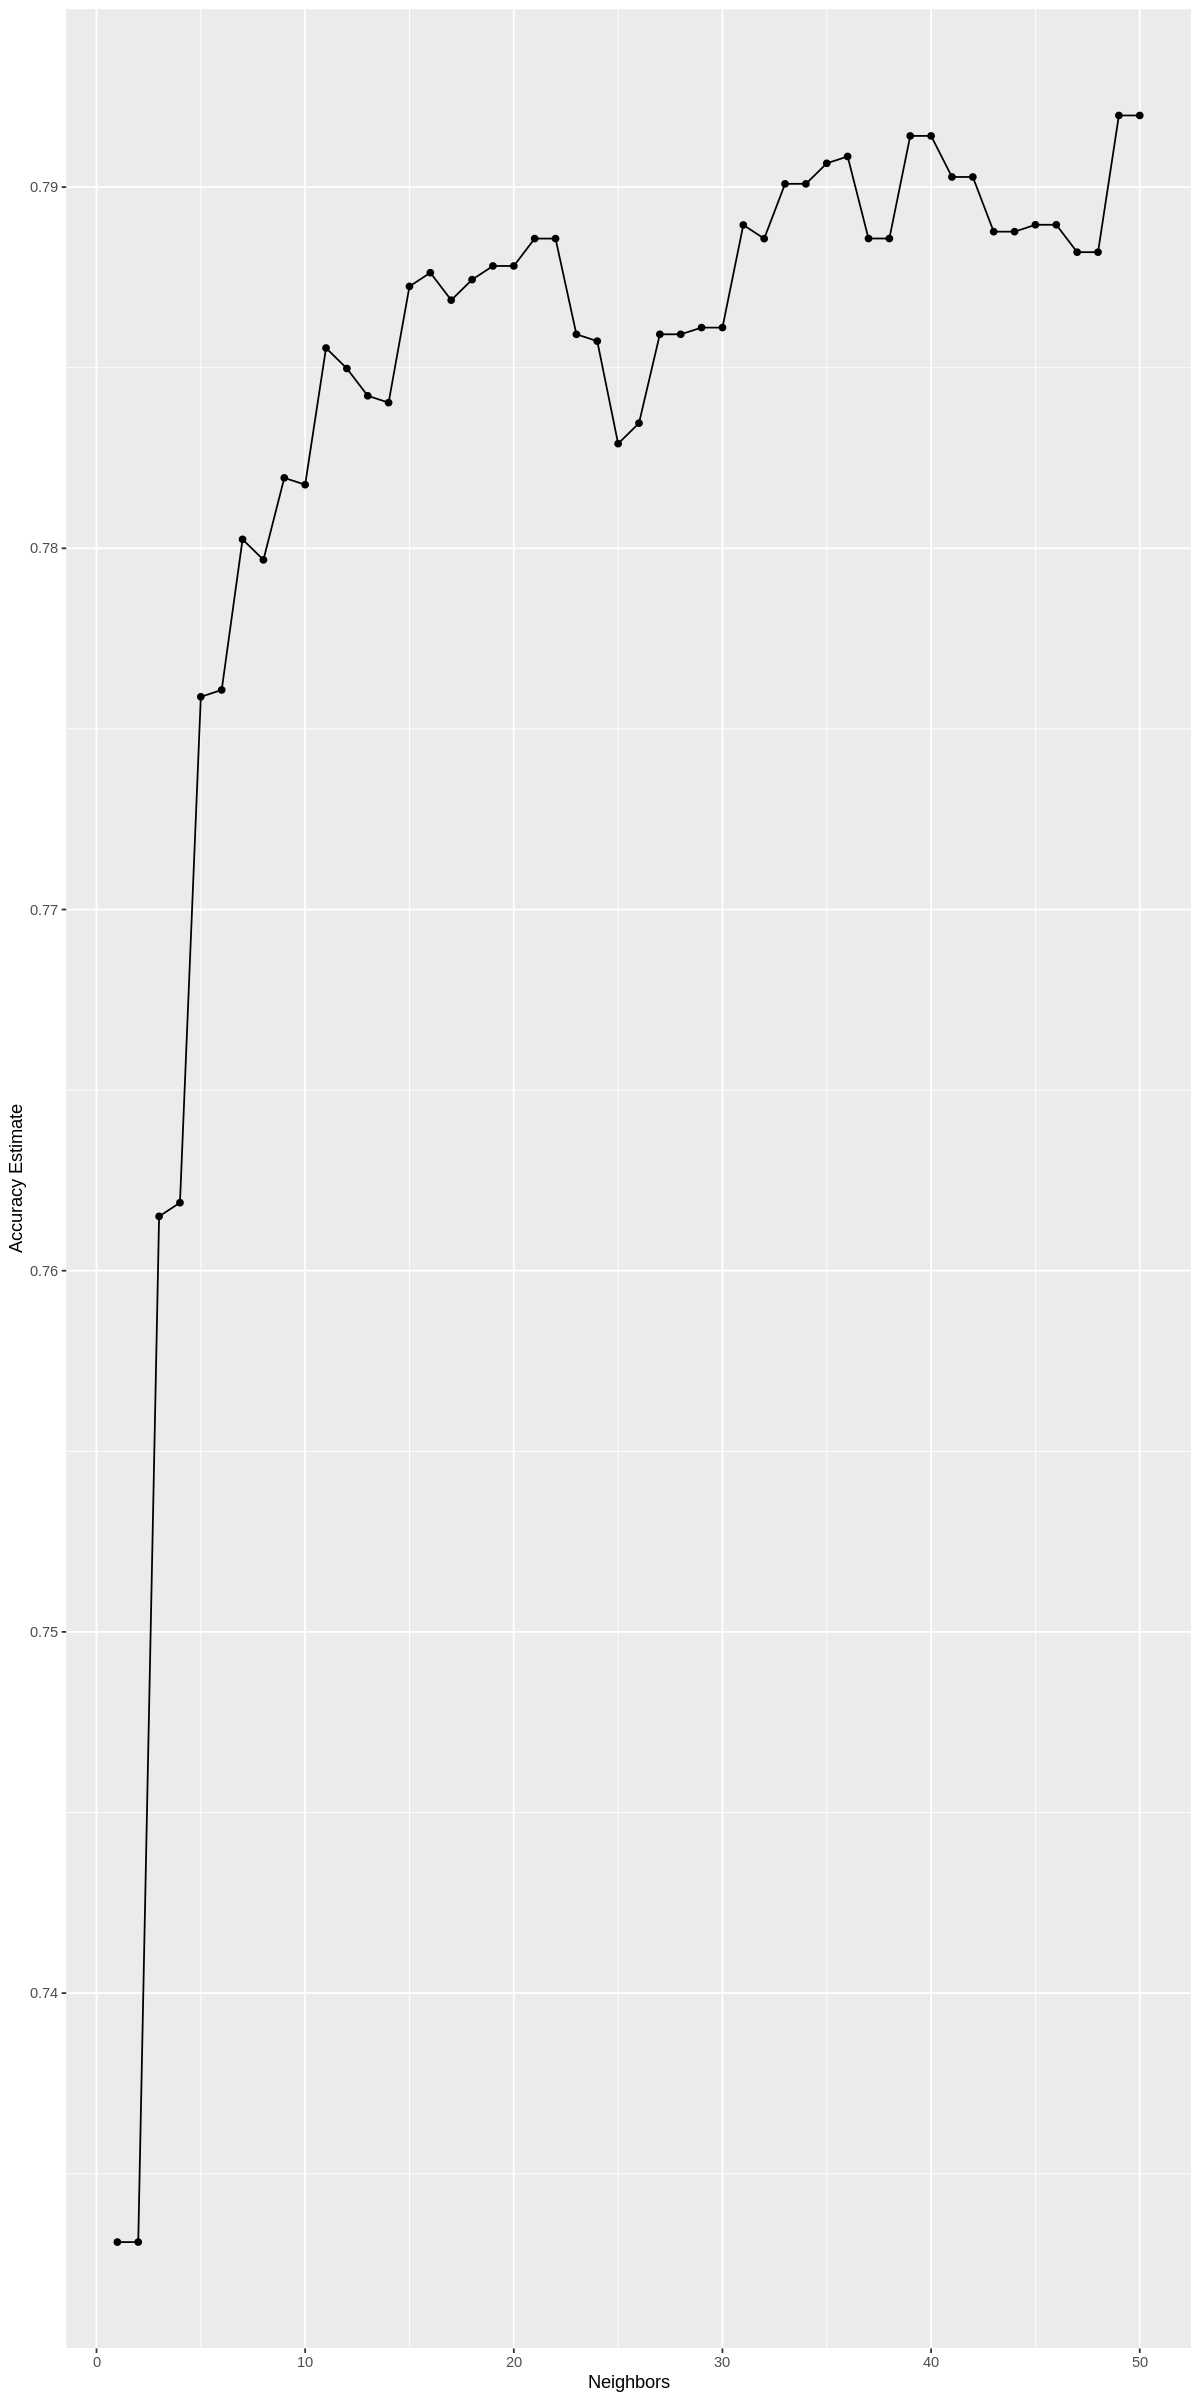

In [13]:
accuracies <- churn_results %>%
    filter(.metric=="accuracy")

k_accuracy <- accuracies %>%
    ggplot(aes(x=neighbors,y=mean))+
    geom_point()+
    geom_line()+
    labs(x="Neighbors", y="Accuracy Estimate")
k_accuracy

In [18]:
churn_spec_test <- nearest_neighbor(weight_func="rectangular", neighbors=50)%>%
    set_engine("kknn")%>%
    set_mode("classification")

churn_test_recipe <- recipe(Churn ~., data=churn_train)

churn_fit <- workflow() %>%
    add_recipe(churn_test_recipe)%>%
    add_model(churn_spec_test)%>%
    fit(data=churn_train)

churn_predictions <- predict(churn_fit, churn_test)%>%
    bind_cols(churn_test)

churn_metrics <- churn_predictions %>%
    metrics(truth=Churn, estimate=.pred_class)%>%
    filter(.metric=="accuracy")

churn_conf_mat <- churn_predictions %>%
    conf_mat(truth=Churn, estimate= .pred_class)

   
churn_metrics
churn_conf_mat

    

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7931818


          Truth
Prediction   No  Yes
       No  1159  230
       Yes  134  237